<a href="https://colab.research.google.com/github/Reyzen-1/CNN-klasifikasi-wajah/blob/main/CNN_Klasifikasi_Wajah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Memulai memuat data training...
Memuat gambar dari kelas: 'jijik'
Memuat gambar dari kelas: 'marah'
Memuat gambar dari kelas: 'sedih'
Memuat gambar dari kelas: 'senang'
Memuat gambar dari kelas: 'takut'
Selesai memuat data.
Epoch 1/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3086 - loss: 1.5886 - val_accuracy: 0.0000e+00 - val_loss: 1.5969
Epoch 2/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.3380 - loss: 1.5620 - val_accuracy: 0.0633 - val_loss: 1.5048
Epoch 3/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.3570 - loss: 1.4965 - val_accuracy: 0.1392 - val_loss: 1.3970
Epoch 4/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4312 - loss: 1.3076 - val_accuracy: 0.0000e+00 - val_loss: 2.2411
Epoch 5/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4792 - loss: 1.1712 - val_accuracy: 0.0506 - val_loss: 1.8865
Epoch 6/2

Model telah disimpan dengan nama: /content/drive/MyDrive/Colab Notebooks/kecerdasan buatan/bobot_ekspresi_wajah.h5

Ringkasan Model CNN:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,888,785 (49.17 MB)

 Trainable params: 4,296,261 (16.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,592,524 (32.78 MB)


Membuat plot loss dan akurasi...


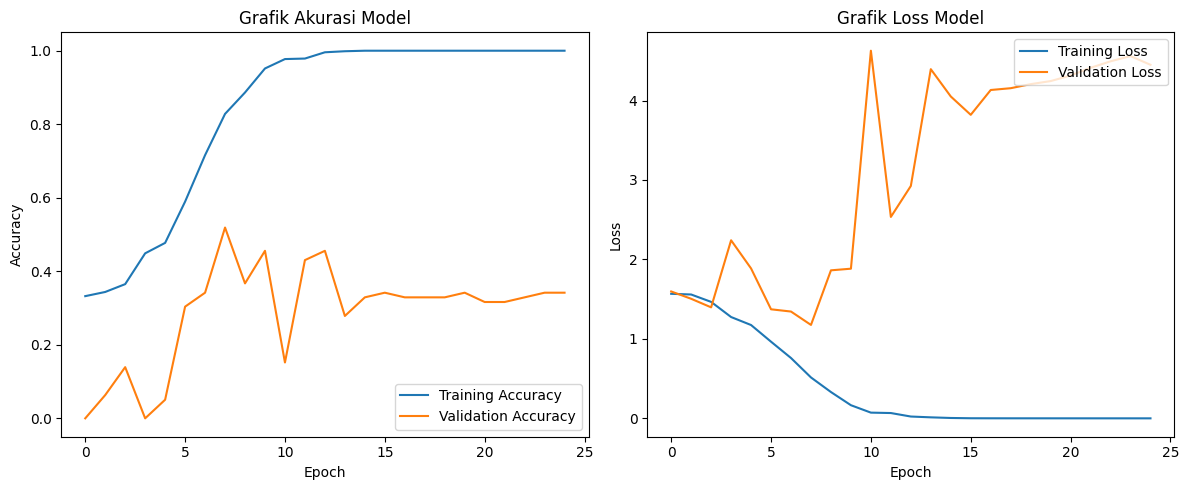

In [2]:
# Impor library yang diperlukan
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten

# =============================================================================
# 1. Menghubungkan ke Google Drive
# =============================================================================
# Baris ini akan meminta Anda untuk otorisasi
drive.mount('/content/drive')

# =============================================================================
# 2. Fungsi untuk Memuat Data Training
# =============================================================================
def LoadCitraTraining(direktori_dataset, label_kelas):
    """
    Fungsi ini memuat gambar dari direktori dataset, mengubah ukurannya,
    menormalisasi, dan memberikan label one-hot encoding.
    """
    jumlah_kelas = len(label_kelas)
    target_kelas = np.eye(jumlah_kelas)

    # Menyiapkan variabel list untuk menampung data citra dan data target
    X = []  # Menampung Data Citra
    T = []  # Menampung Target (Label)

    print("Memulai memuat data training...")
    for i in range(len(label_kelas)):
        # Membuat path lengkap ke direktori setiap kelas
        dir_kelas = os.path.join(direktori_dataset, label_kelas[i])
        files = os.listdir(dir_kelas)
        print(f"Memuat gambar dari kelas: '{label_kelas[i]}'")

        for f in files:
            ff = f.lower()
            # Memilih citra dengan ekstensi jpg, jpeg, dan png
            if (ff.endswith('.jpg') | ff.endswith('.jpeg') | ff.endswith('.png')):
                nm_file = os.path.join(dir_kelas, f)

                # Membaca citra berwarna dan mengubah ukurannya
                img = cv2.imread(nm_file, 1)
                img = cv2.resize(img, (128, 128))

                # Konversi ke float dan normalisasi data citra (nilai piksel antara 0-1)
                img = np.asarray(img, dtype='float32') / 255.0

                # Menambahkan citra dan target ke dalam list
                X.append(img)
                T.append(target_kelas[i])

    print("Selesai memuat data.")
    # Mengubah List menjadi numpy array agar bisa diproses oleh Keras
    X = np.array(X, dtype='float32')
    T = np.array(T, dtype='float32')

    return X, T

# =============================================================================
# 3. Fungsi untuk Membangun Model CNN
# =============================================================================
def ModelDeepLearningCNN(jumlah_kelas):
    """
    Fungsi ini membangun arsitektur model Convolutional Neural Network (CNN).
    """
    input_img = Input(shape=(128, 128, 3))

    # Layer Konvolusi dan Max Pooling
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # Meratakan output untuk dihubungkan ke Dense layer
    x = Flatten()(x)

    # Fully Connected Layer (Dense)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)

    # Layer Output dengan aktivasi softmax untuk klasifikasi multi-kelas
    x = Dense(jumlah_kelas, activation='softmax')(x)

    ModelCNN = Model(input_img, x)

    # Kompilasi model dengan loss function, optimizer, dan metrik
    ModelCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return ModelCNN

# =============================================================================
# 4. Fungsi untuk Melatih Model CNN
# =============================================================================
def TrainingCNN(jumlah_epoch, direktori_dataset, label_kelas, nama_file_bobot='weight.h5'):
    """
    Fungsi ini menggabungkan proses loading data, pembuatan model,
    dan training model.
    """
    # Membaca Data training dan label Kelas
    X, D = LoadCitraTraining(direktori_dataset, label_kelas)
    jumlah_kelas = len(label_kelas)

    # Membuat Model CNN
    ModelCNN = ModelDeepLearningCNN(jumlah_kelas)

    # Melakukan training model
    history = ModelCNN.fit(X, D, epochs=jumlah_epoch, shuffle=True, validation_split=0.1)

    # Menyimpan hasil training (bobot)
    ModelCNN.save(nama_file_bobot)
    print(f"Model telah disimpan dengan nama: {nama_file_bobot}")

    return ModelCNN, history

# =============================================================================
# 5. Program Utama
# =============================================================================

# a. Menentukan direktori yang menyimpan dataset di Google Drive
#    PASTIKAN PATH INI SESUAI DENGAN LOKASI FOLDER ANDA
DirektoriDataSet = "/content/drive/MyDrive/Colab Notebooks/kecerdasan buatan"

# b. Label kelas (nama folder harus sama persis dengan label ini)
LabelKelas = ("jijik", "marah", "sedih", "senang", "takut")

# c. Inisialisasi parameter Training
JumlahEpoch = 25  # Anda bisa menaikkan jumlah epoch untuk akurasi yang lebih baik
FileBobot =  "/content/drive/MyDrive/Colab Notebooks/kecerdasan buatan/bobot_ekspresi_wajah.h5"

# d. Memulai proses training
ModelCNN, history = TrainingCNN(JumlahEpoch, DirektoriDataSet, LabelKelas, FileBobot)

# e. Menampilkan ringkasan arsitektur model
print("\nRingkasan Model CNN:")
ModelCNN.summary()

# f. Menampilkan Grafik Loss dan Accuracy
print("\nMembuat plot loss dan akurasi...")
plt.figure(figsize=(12, 5))

# Plot untuk Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Grafik Akurasi Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot untuk Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Grafik Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Error: Gagal memuat model. Pastikan file '/content/drive/MyDrive/Colab Notebooks/datasetklasifikasiwajah/bobot_ekspresi_wajah.h5' ada di direktori Anda.
[Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/Colab Notebooks/datasetklasifikasiwajah/bobot_ekspresi_wajah.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

Silakan unggah satu atau lebih gambar untuk dideteksi...


Saving ffhq_102.png to ffhq_102.png


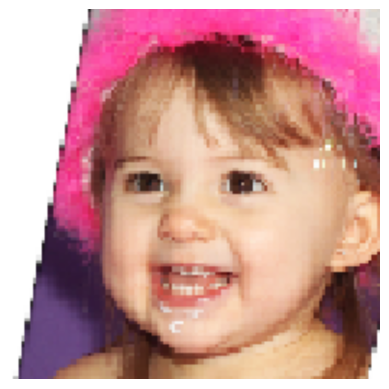

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Hasil deteksi untuk file: ffhq_102.png
Skor Keyakinan (Confidence Score):
- Jijik     : 0.03%
- Marah     : 0.00%
- Sedih     : 0.00%
- Senang    : 99.97%
- Takut     : 0.00%
HASIL PREDIKSI: Ekspresi wajah adalah 'SENANG'
dengan keyakinan 99.97%.




In [4]:
# Impor library yang diperlukan untuk deteksi
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# =============================================================================
# 1. Muat Model yang Sudah Dilatih
# =============================================================================
# Pastikan nama file ini sama dengan file bobot yang disimpan saat training
nama_file_bobot = "/content/drive/MyDrive/Colab Notebooks/datasetklasifikasiwajah/bobot_ekspresi_wajah.h5"
try:
    ModelCNN = load_model(nama_file_bobot)
    print(f"Model '{nama_file_bobot}' berhasil dimuat.")
except Exception as e:
    print(f"Error: Gagal memuat model. Pastikan file '{nama_file_bobot}' ada di direktori Anda.")
    print(e)

# =============================================================================
# 2. Definisikan Ulang Label Kelas
# =============================================================================
# Label ini harus sama persis urutannya dengan yang digunakan saat training
LabelKelas = ("jijik", "marah", "sedih", "senang", "takut")

# =============================================================================
# 3. Program untuk Mengunggah dan Mengklasifikasikan Gambar
# =============================================================================
print("\nSilakan unggah satu atau lebih gambar untuk dideteksi...")
uploaded = files.upload()

for fn in uploaded.keys():
  # Memuat dan memproses gambar yang diunggah
  path = fn
  img = image.load_img(path, target_size=(128, 128))

  # Menyiapkan plot untuk menampilkan gambar
  plt.imshow(img)
  plt.axis('off') # Menyembunyikan sumbu x dan y
  plt.show()

  # Mengubah gambar menjadi array, normalisasi, dan menambah dimensi batch
  x = image.img_to_array(img)
  x = x / 255.0  # Normalisasi harus sama dengan saat training
  x = np.expand_dims(x, axis=0)

  # Melakukan prediksi dengan model yang sudah dimuat
  classes = ModelCNN.predict(x, batch_size=10)

  print(f"Hasil deteksi untuk file: {fn}")
  print("="*40)

  # Menampilkan skor persentase untuk setiap kelas
  print("Skor Keyakinan (Confidence Score):")
  for i in range(len(LabelKelas)):
      print(f"- {LabelKelas[i].capitalize():<10}: {classes[0][i]*100:.2f}%")

  print("="*40)

  # Menemukan kelas dengan skor tertinggi sebagai hasil prediksi akhir
  prediksi_indeks = np.argmax(classes[0])
  prediksi_kelas = LabelKelas[prediksi_indeks]
  prediksi_skor = classes[0][prediksi_indeks] * 100

  print(f"HASIL PREDIKSI: Ekspresi wajah adalah '{prediksi_kelas.upper()}'")
  print(f"dengan keyakinan {prediksi_skor:.2f}%.")
  print("\n" + "="*40 + "\n")

In [7]:
pip install anvil-uplink

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.4 MB/s eta 0:00:00


In [ ]:
# Langkah 1: Pastikan library yang dibutuhkan sudah terinstall
# Jalankan di sel terpisah: !pip install anvil-uplink tensorflow

import anvil.server
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
import io
import os

# =============================================================================
# !!! PENTING: Hubungkan (Mount) Google Drive Terlebih Dahulu !!!
# =============================================================================
from google.colab import drive
try:
    drive.mount('/content/drive')
    print("Google Drive berhasil terhubung.")
except Exception as e:
    print(f"Gagal menghubungkan ke Google Drive: {e}")


# =============================================================================
# Hubungkan ke Anvil menggunakan Uplink Key Anda
# GANTI "YOUR_UPLINK_KEY" DENGAN KUNCI DARI APLIKASI ANVIL ANDA
# =============================================================================
try:
    anvil.server.connect("server_VUVB2BSIRRFCNXBPRWXDPPOQ-U3ICS5GKQ6URHCMB")
    print("Berhasil terhubung ke Anvil Uplink Server.")
except Exception as e:
    print("Gagal terhubung ke Anvil. Pastikan Uplink Key Anda benar.")
    print(e)

# =============================================================================
# Muat Model yang Sudah Dilatih dari Google Drive
# Path ini harus sama dengan lokasi penyimpanan di skrip training Anda
# =============================================================================
try:
    # Path lengkap menuju file model di dalam folder dataset Anda di Google Drive
    nama_file_bobot = "/content/drive/MyDrive/Colab Notebooks/kecerdasan buatan/bobot_ekspresi_wajah.h5"

    # Cek apakah file model ada sebelum mencoba memuatnya
    if os.path.exists(nama_file_bobot):
        ModelCNN = load_model(nama_file_bobot)
        print(f"Model '{nama_file_bobot}' berhasil dimuat dari Google Drive.")
    else:
        print(f"Error: File model tidak ditemukan di path: {nama_file_bobot}")
        print("Pastikan Anda sudah menjalankan skrip training untuk menyimpannya ke Google Drive.")

except Exception as e:
    print(f"Error: Gagal memuat model. Pastikan path file benar dan Anda sudah mount Google Drive.")
    print(e)


# =============================================================================
# Definisikan Ulang Label Kelas (Urutan harus sama persis)
# =============================================================================
LabelKelas = ("jijik", "marah", "sedih", "senang", "takut")

# =============================================================================
# Buat Fungsi yang Bisa Dipanggil dari Anvil (Anvil Callable Function)
# =============================================================================
@anvil.server.callable
def classify_image(file):
    """
    Fungsi ini menerima file gambar dari Anvil, melakukan prediksi,
    dan mengembalikan hasilnya.
    """
    print("Menerima gambar untuk klasifikasi...")

    # Membaca gambar dari Anvil Media Object
    img = Image.open(io.BytesIO(file.get_bytes())).convert('RGB')

    # Pra-pemrosesan gambar (sama seperti saat training/testing di Colab)
    img = img.resize((128, 128))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0) # Tambah dimensi batch

    # Melakukan prediksi
    prediction = ModelCNN.predict(img_array)

    # Mendapatkan kelas dan skor tertinggi
    prediksi_indeks = np.argmax(prediction[0])
    prediksi_kelas = LabelKelas[prediksi_indeks]
    prediksi_skor = prediction[0][prediksi_indeks] * 100

    print(f"Prediksi: {prediksi_kelas.upper()} ({prediksi_skor:.2f}%)")

    # Mengembalikan hasil sebagai dictionary agar mudah diakses di Anvil
    return {
        "kelas": prediksi_kelas.capitalize(),
        "skor": f"{prediksi_skor:.2f}"
    }

# =============================================================================
# Jaga agar skrip tetap berjalan untuk mendengarkan panggilan dari Anvil
# =============================================================================
print("\nServer siap menerima panggilan dari aplikasi Anvil Anda.")
print("Biarkan sel Colab ini tetap berjalan.")
anvil.server.wait_forever()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive berhasil terhubung.
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER
Berhasil terhubung ke Anvil Uplink Server.


Model '/content/drive/MyDrive/Colab Notebooks/kecerdasan buatan/bobot_ekspresi_wajah.h5' berhasil dimuat dari Google Drive.

Server siap menerima panggilan dari aplikasi Anvil Anda.
Biarkan sel Colab ini tetap berjalan.
Menerima gambar untuk klasifikasi...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Prediksi: SENANG (100.00%)
Menerima gambar untuk klasifikasi...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Prediksi: SENANG (100.00%)
Menerima gambar untuk klasifikasi...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Prediksi: SENANG (99.96%)
Menerima gambar untuk klasifikasi...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediksi: TAKUT (86.56%)
